In [218]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [274]:
# finds distance from index 0 to last index, moving left to right
def find_dist(coords):
    last = coords[0]
    dist = 0
    
    for i in range(1, len(coords)):
        temp_dist = np.sqrt(( np.square(( last[0] - coords[i][0] )) + np.square( last[1] - coords[i][1] )))
        dist += temp_dist
        last = coords[i]
    
    return dist

# switch two objects in the list
def mutate(coords):
    temp_coords = coords.copy()
    index_1 = random.randint(1, len(temp_coords) - 1)
    index_2 = random.randint(1, len(temp_coords) - 1)
    
    temp_coord = temp_coords[index_1]
    temp_coords[index_1] = temp_coords[index_2]
    temp_coords[index_2] = temp_coord
    
    print(temp_coords)
    return temp_coords

# make babies
def reproduce(coords, size):
    members = []

    for i in range(size):
        members.append(mutate(coords))
    
    return members
    
# choose best baby
def select(members):
    distances = []
    lowest = find_dist(members[0])
    index = 0
    
    for i in range(1, len(members) - 1):
        distances.append(find_dist(members[i]))
        this_distance = find_dist(members[i])
        
        if this_distance < lowest:
            index = i
            lowest = this_distance
            
    return members[index]

[(0, 0), (2, 1), (2, 0), (1, 2), (0, 1)]
[(0, 0), (2, 1), (0, 1), (1, 2), (2, 0)]
[(0, 0), (2, 1), (2, 0), (0, 1), (1, 2)]
[(0, 0), (2, 0), (2, 1), (1, 2), (0, 1)]
[(0, 0), (2, 1), (2, 0), (1, 2), (0, 1)]
[(0, 0), (2, 0), (2, 1), (1, 2), (0, 1)]
[(0, 0), (0, 1), (2, 0), (1, 2), (2, 1)]
[(0, 0), (2, 1), (1, 2), (2, 0), (0, 1)]
[(0, 0), (2, 1), (1, 2), (2, 0), (0, 1)]
[(0, 0), (2, 1), (1, 2), (2, 0), (0, 1)]
[(0, 0), (2, 1), (0, 1), (1, 2), (2, 0)]
[(0, 0), (2, 1), (2, 0), (1, 2), (0, 1)]
[(0, 0), (0, 1), (2, 0), (1, 2), (2, 1)]
[(0, 0), (2, 1), (2, 0), (0, 1), (1, 2)]
[(0, 0), (0, 1), (2, 0), (1, 2), (2, 1)]
[(0, 0), (2, 1), (2, 0), (0, 1), (1, 2)]
[(0, 0), (2, 1), (1, 2), (2, 0), (0, 1)]
[(0, 0), (1, 2), (2, 0), (2, 1), (0, 1)]
[(0, 0), (0, 1), (2, 0), (1, 2), (2, 1)]
[(0, 0), (2, 1), (1, 2), (2, 0), (0, 1)]
[(0, 0), (2, 0), (2, 1), (1, 2), (0, 1)]
5.82842712474619


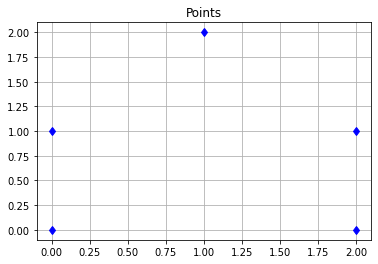

In [282]:
coords_lst = [(0,0), (2,1), (2,0), (1,2), (0,1)]
x, y = np.array(coords_lst).T

fittest_found = False
latest_dist = 1000000
while not fittest_found:
    members = reproduce(coords_lst, 10)
    fittest_parent = select(members)
    
    temp_dist = find_dist(fittest_parent)
    
    if temp_dist < latest_dist:
        latest_dist = temp_dist
        last_parent = fittest_parent
    
    elif temp_dist > latest_dist:
        fittest_found = True
    

print(last_parent)
print(find_dist(last_parent))

plt.title("Points")
plt.plot(x, y, 'bd')
plt.grid()
plt.show()